# 주제 : 우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소

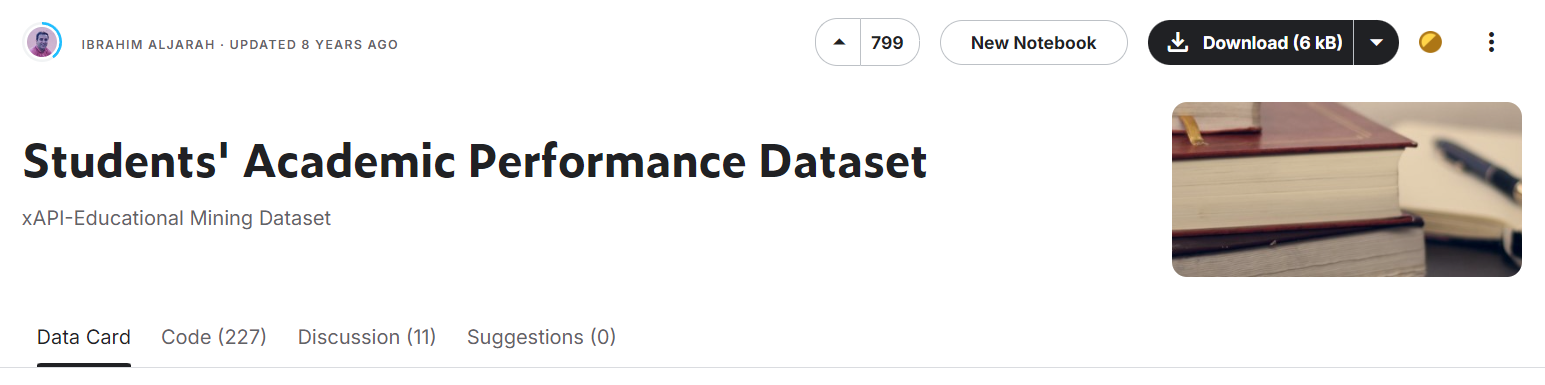

## Step 1) 데이터 셋 준비하기

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### (1) NOTEBOOK 에 KAGGLE API 준비하기

In [16]:
import os

In [18]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = "bapsay"
os.environ['KAGGLE_KEY'] = "b137d644aba5535d746345124c23dc8c"

### (2) 데이터 다운로드 및 압축 해제하기

In [20]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드 하기(!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d aljarah/xAPI-Edu-Data
!tar -zxvf xAPI-Edu-Data.zip

Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0




  0%|          | 0.00/5.54k [00:00<?, ?B/s]
100%|##########| 5.54k/5.54k [00:00<00:00, 5.67MB/s]
x xAPI-Edu-Data.csv


### (3) Pandas 라이브러리로 csv파일 읽어들이기

In [31]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('C:/Users/705-2/2. 파이썬 머신러닝 완벽가이드/xAPI-Edu-Data.csv')

In [39]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Step 2) EDA 및 데이터 기초 통계 분석

### (4) 데이터프레임의 각 칼럼 분석하기

In [49]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [58]:
df.describe()  # 최소-최대 값을 확인하였을 때, 스케일이 큰 차이는 나지 않는 것 같다. (Standard Scaling 추천)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [60]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [62]:
df['gender'].value_counts()

gender
M    305
F    175
Name: count, dtype: int64

In [64]:
df['NationalITy'].value_counts()

NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

In [68]:
df['PlaceofBirth'].value_counts()

PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

In [70]:
df['StageID'].value_counts()

StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64

In [72]:
df['GradeID'].value_counts()

GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: count, dtype: int64

In [74]:
df['SectionID'].value_counts()

SectionID
A    283
B    167
C     30
Name: count, dtype: int64

In [76]:
df['Topic'].value_counts()

Topic
IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: count, dtype: int64

### 수치형 데이터의 히스토그램 그리기

In [79]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<Axes: xlabel='raisedhands', ylabel='Count'>

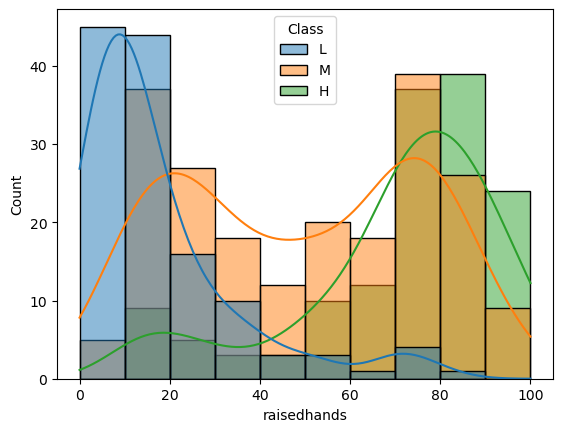

In [95]:
# seaborn의 histplot, jointplot, pariplot을 이용해 히스토그램 그리기

sns.histplot(x='raisedhands', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

<Axes: xlabel='VisITedResources', ylabel='Count'>

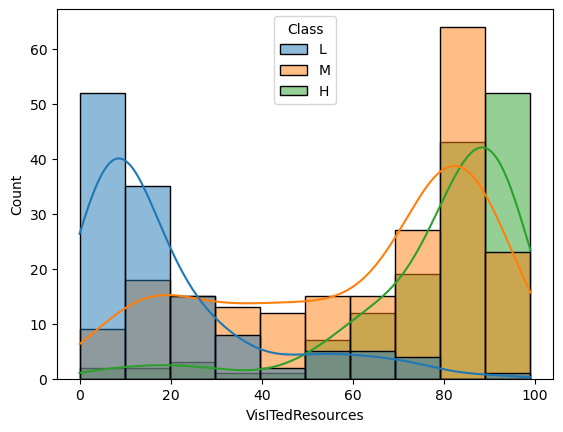

In [97]:
sns.histplot(x='VisITedResources', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

<Axes: xlabel='AnnouncementsView', ylabel='Count'>

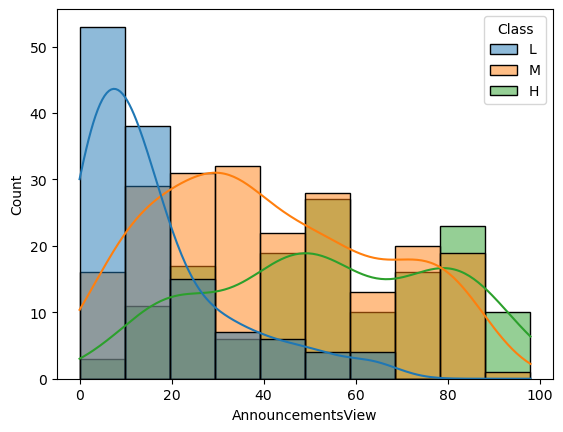

In [99]:
sns.histplot(x='AnnouncementsView', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

<Axes: xlabel='Discussion', ylabel='Count'>

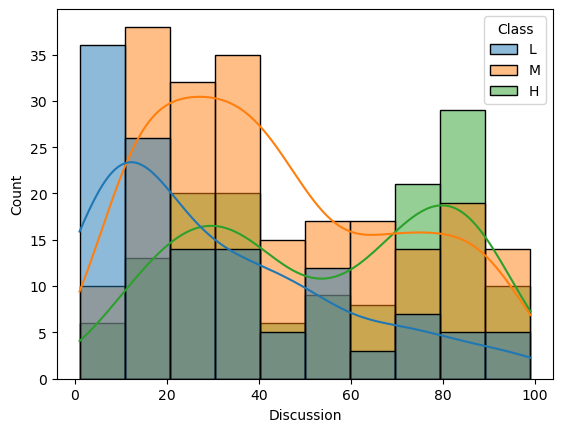

In [101]:
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L','M','H'], kde=True)

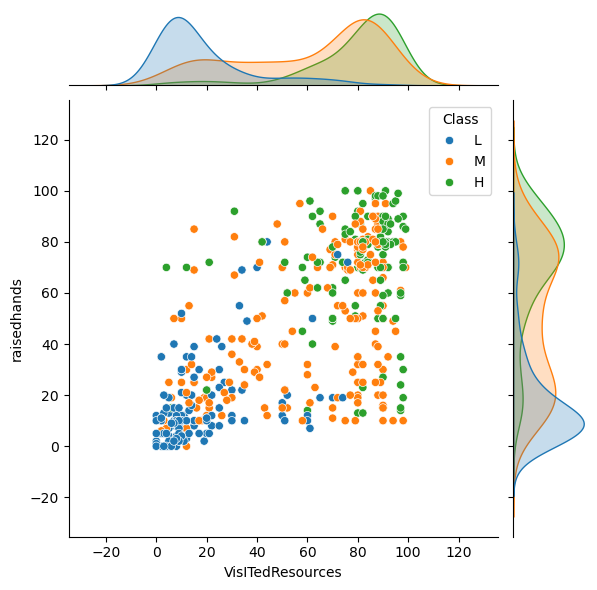

In [105]:
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L','M','H'])

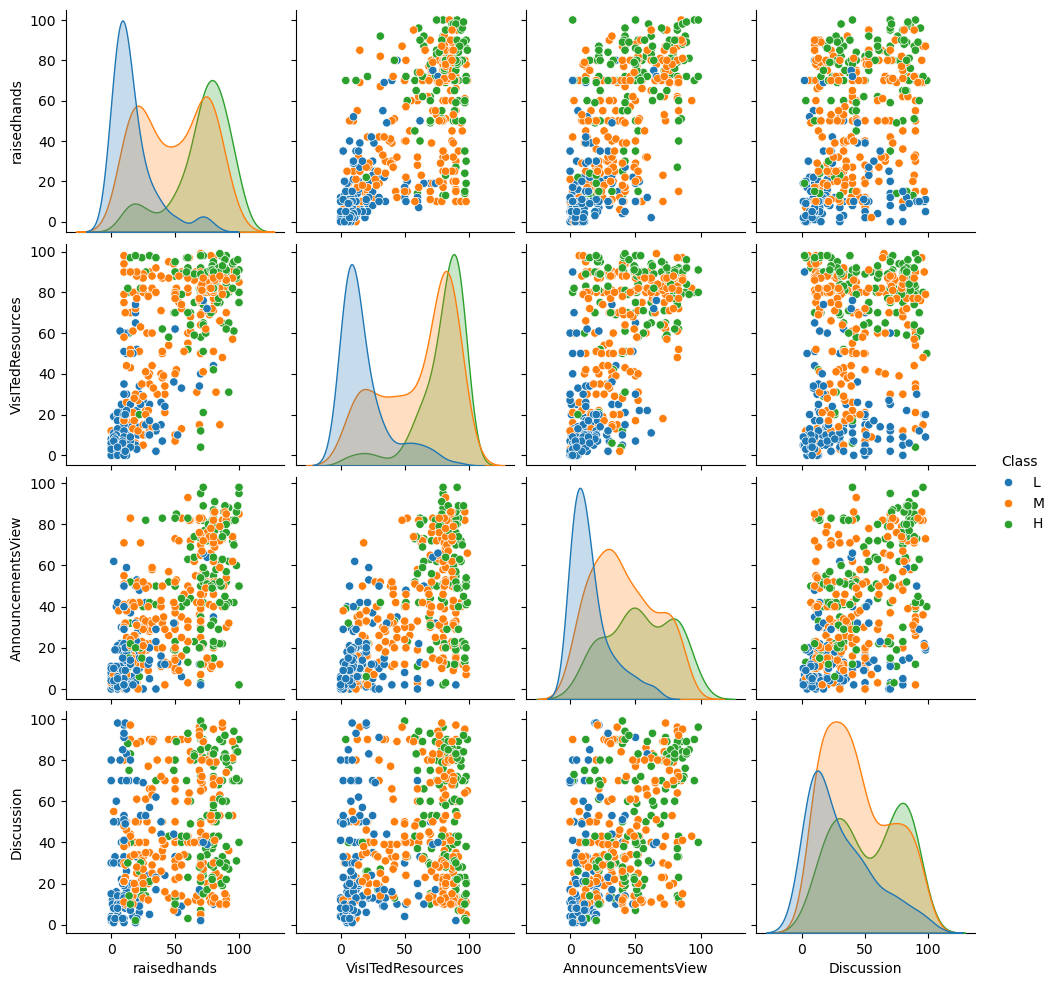

In [109]:
sns.pairplot(df, hue='Class', hue_order=['L','M','H'])

### Countplot을 이용하여 범주별 통계 확인하기

<Axes: xlabel='Class', ylabel='count'>

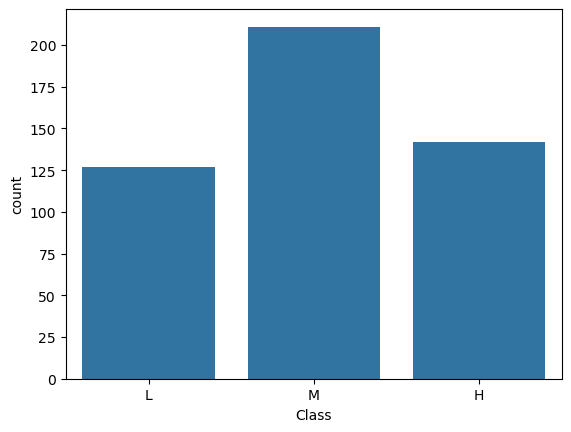

In [116]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 총계 확인
sns.countplot(x='Class', data=df, order=['L','M','H']) # 클래스 불균형화 문제가 있다

<Axes: xlabel='gender', ylabel='count'>

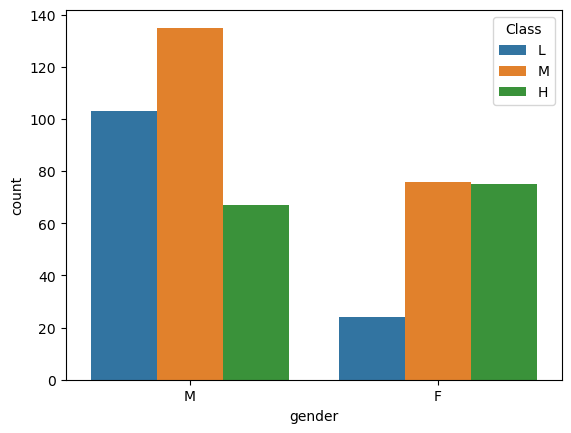

In [122]:
sns.countplot(x='gender', data=df, hue='Class',hue_order=['L','M','H'])

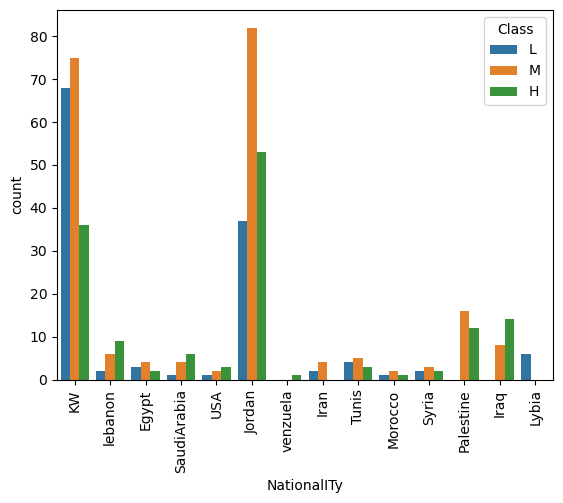

In [126]:
sns.countplot(x='NationalITy', data=df, hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='ParentAnsweringSurvey', ylabel='count'>

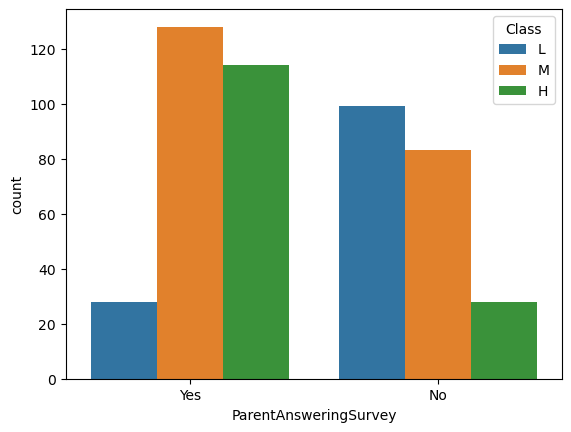

In [128]:
sns.countplot(x='ParentAnsweringSurvey', data=df, hue='Class',hue_order=['L','M','H'])

<Axes: xlabel='ParentschoolSatisfaction', ylabel='count'>

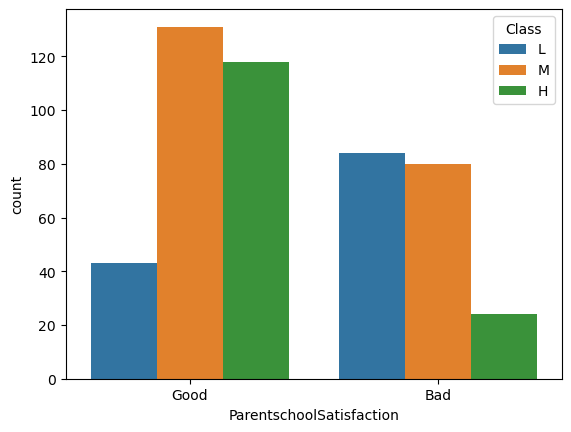

In [130]:
sns.countplot(x='ParentschoolSatisfaction', data=df, hue='Class',hue_order=['L','M','H'])

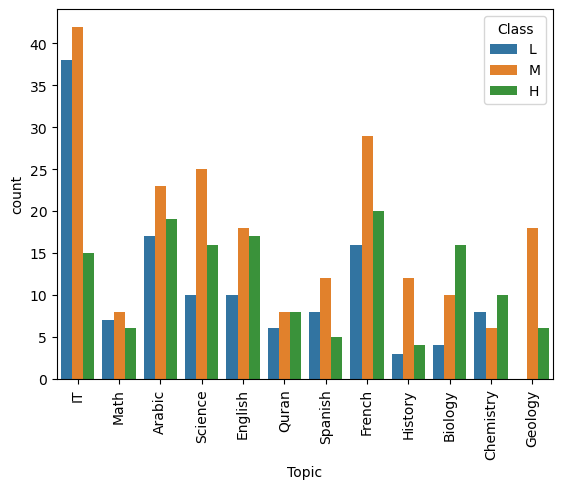

In [132]:
sns.countplot(x='Topic', data=df, hue='Class',hue_order=['L','M','H'])
plt.xticks(rotation=90)
plt.show()

### 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [135]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L:-1, H:0, H:1)
# Hint) DataFrame의 map() 메소드를 사용
df['Class_value'] = df['Class'].map(dict(L=-1,M=0,H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [143]:
df.groupby('gender').mean(numeric_only=True)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class_value
gender,,,,,
F,52.862857,64.000000,39.748571,47.828571,0.291429
M,43.281967,49.518033,36.868852,40.675410,-0.118033


<BarContainer object of 2 artists>

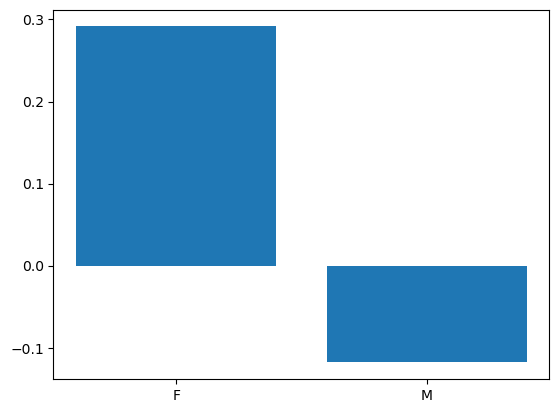

In [145]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
gb = df.groupby('gender').mean(numeric_only=True)['Class_value']
plt.bar(gb.index,gb)

<BarContainer object of 12 artists>

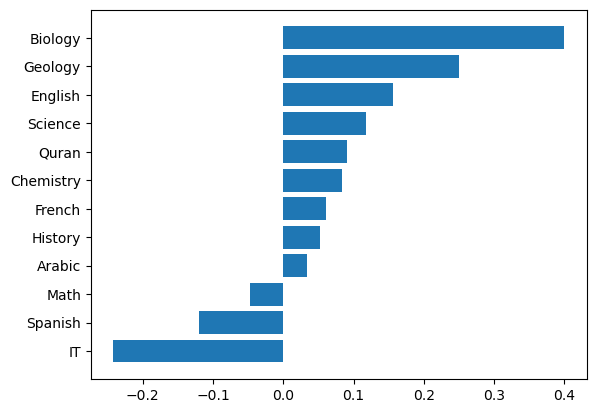

In [149]:
gb = df.groupby('Topic').mean(numeric_only=True)['Class_value'].sort_values()
plt.barh(gb.index,gb)

<BarContainer object of 2 artists>

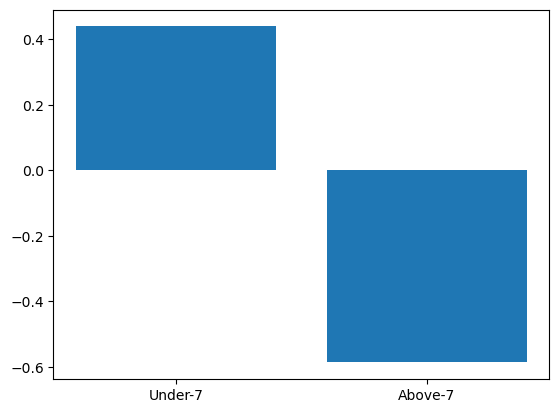

In [157]:
gb = df.groupby('StudentAbsenceDays').mean(numeric_only=True)['Class_value'].sort_values(ascending=False)
plt.bar(gb.index,gb)

## 2. 모델 학습을 위한 데이터전처리

### get_dummies()를 이용하여 범주형 데이터 전처리하기

In [ ]:
df = pd.read_csv('C:/Users/705-2/2. 파이썬 머신러닝 완벽가이드/xAPI-Edu-Data.csv')

In [162]:
df['Class'] = df['Class'].map(dict(H=0,M=1,L=2))

In [168]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction','PlaceofBirth', 'Class', 'Class_value'], axis=1),
                   columns=['gender', 'NationalITy', 'StageID', 'GradeID', 
                            'SectionID', 'Topic', 'Semester','Relation',
                            'ParentAnsweringSurvey', 'StudentAbsenceDays'],
                   drop_first=True).astype('int')
y = df['Class']                            

In [170]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


### 학습데이터와 테스트데이터 분리하기

In [173]:
from sklearn.model_selection import train_test_split
#traitrain_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Step 4) Classification 모델 학습하기

### KNeighbors Classifier 모델 생성/학습하기 

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
# 모델 생성/학습
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

### KNeighbors Classifier 모델 평가

In [188]:
knn_pred = knn.predict(X_test)

In [190]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test, knn_pred)
knn_matrix

array([[31, 22,  2],
       [ 7, 44,  5],
       [ 1,  7, 25]], dtype=int64)

In [192]:
from sklearn.metrics import classification_report

In [194]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.56      0.66        55
           1       0.60      0.79      0.68        56
           2       0.78      0.76      0.77        33

    accuracy                           0.69       144
   macro avg       0.73      0.70      0.70       144
weighted avg       0.72      0.69      0.69       144



### Support Vector Machines Classifier 모델 생성/학습하기

In [182]:
from sklearn import svm

In [184]:
# 모형 객체 생성 (기본값 kernel = 'rbf' 적용)
svm = svm.SVC()
# train data를 가지고 모형 학습
svm.fit(X_train, y_train)

SVC()

### Support Vector Machines Classifier 모델 평가

In [200]:
svm_pred = svm.predict(X_test)

In [204]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, svm_pred)
svm_matrix

array([[23, 30,  2],
       [10, 38,  8],
       [ 0,  5, 28]], dtype=int64)

In [206]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52        55
           1       0.52      0.68      0.59        56
           2       0.74      0.85      0.79        33

    accuracy                           0.62       144
   macro avg       0.65      0.65      0.63       144
weighted avg       0.64      0.62      0.61       144



### DecisionTreeClassifier 모델 생성/학습하기

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### DecisionTreeClassifier 모델 평가

In [213]:
dt_pred = dt.predict(X_test)

In [215]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
dt_matrix = metrics.confusion_matrix(y_test, dt_pred)

array([[38, 16,  1],
       [ 9, 41,  6],
       [ 1,  3, 29]], dtype=int64)

In [398]:
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, dt_pred)
print(dt_matrix)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))
print(classification_report(y_test, dt_pred))

[[38 16  1]
 [ 9 41  6]
 [ 1  3 29]]
결정 트리 예측 정확도: 0.7569
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        55
           1       0.69      0.71      0.70        56
           2       0.78      0.88      0.83        33

    accuracy                           0.76       144
   macro avg       0.76      0.77      0.77       144
weighted avg       0.76      0.76      0.76       144



C:\Users\705-2\AppData\Local\Temp\ipykernel_6028\2713190725.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top20, y=ftr_top20.index, palette='Set2')


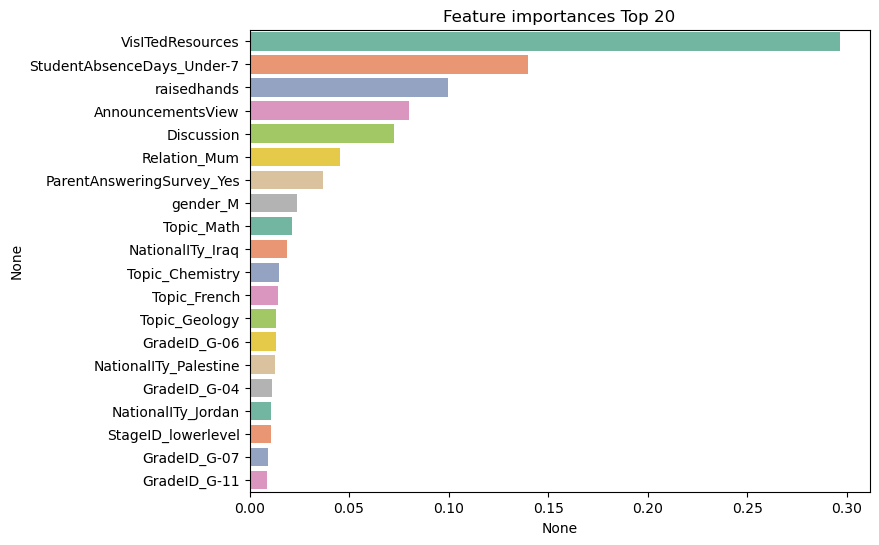

In [416]:
ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette='Set2')
plt.show()

### Random Forest 모델 생성/학습하기

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [220]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Random Forest 모델 평가

In [222]:
rf_pred = rf.predict(X_test)

In [402]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
rf_matrix = metrics.confusion_matrix(y_test, rf_pred)

In [408]:
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
print(dt_matrix)
print('Random Forest 예측 정확도: {0:.4f}'.format(accuracy))
print(classification_report(y_test, rf_pred))

[[38 16  1]
 [ 9 41  6]
 [ 1  3 29]]
Random Forest 예측 정확도: 0.7639
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        55
           1       0.68      0.75      0.71        56
           2       0.85      0.85      0.85        33

    accuracy                           0.76       144
   macro avg       0.78      0.78      0.78       144
weighted avg       0.77      0.76      0.77       144



C:\Users\705-2\AppData\Local\Temp\ipykernel_6028\1644302702.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top20, y=ftr_top20.index, palette='Set2')


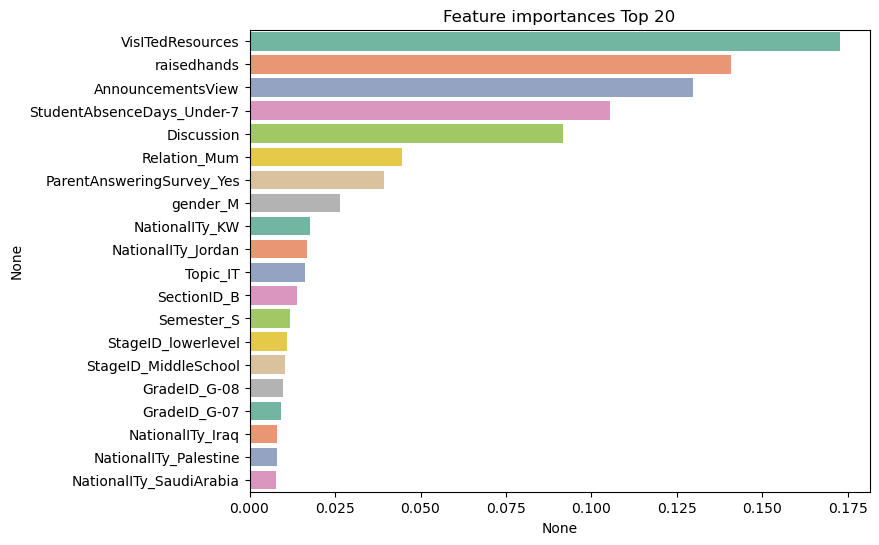

In [414]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette='Set2')
plt.show()

### GBM(Gradient Boosting Machine) 모델 생성/학습하기

In [290]:
from sklearn.ensemble import  GradientBoostingClassifier

In [324]:
gbm = GradientBoostingClassifier(random_state=1)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

### GBM(Gradient Boosting Machine) 모델 평가

In [326]:
gbm_pred = gbm.predict(X_test)

In [328]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
gbm_matrix = metrics.confusion_matrix(y_test, gbm_pred)
gbm_matrix

array([[41, 14,  0],
       [ 8, 42,  6],
       [ 0,  6, 27]], dtype=int64)

In [410]:
from sklearn.metrics import accuracy_score

gbm_clf = GradientBoostingClassifier(random_state=0)
gbm_clf.fit(X_train, y_train)
gbm_pred = gbm_clf.predict(X_test)
accuracy = accuracy_score(y_test, gbm_pred)
print(gbm_matrix)
print('GBM 예측 정확도: {0:.4f}'.format(accuracy))
print(classification_report(y_test, gbm_pred))

[[41 14  0]
 [ 8 42  6]
 [ 0  6 27]]
GBM 예측 정확도: 0.7639
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        55
           1       0.68      0.75      0.71        56
           2       0.82      0.82      0.82        33

    accuracy                           0.76       144
   macro avg       0.78      0.77      0.77       144
weighted avg       0.77      0.76      0.77       144



C:\Users\705-2\AppData\Local\Temp\ipykernel_6028\2419953552.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_top20, y=ftr_top20.index, palette='Set2')


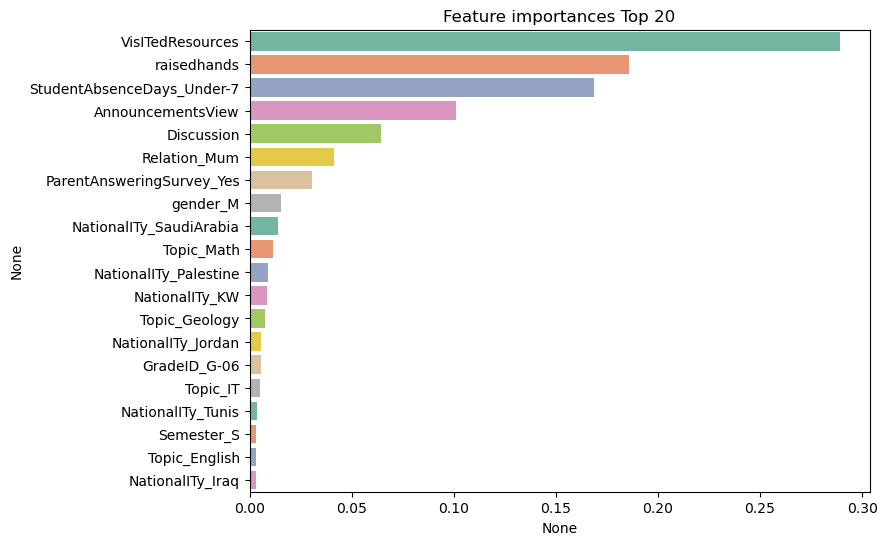

In [418]:
ftr_importances_values = gbm_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette='Set2')
plt.show()

### XGBoost(eXtra Gradient Boost) 모델 생성/학습하기

In [333]:
from xgboost import XGBClassifier

In [335]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### XGBoost(eXtra Gradient Boost) 모델 평가

In [337]:
xgb_pred = xgb.predict(X_test)

In [339]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
xgb_matrix = metrics.confusion_matrix(y_test, xgb_pred)
xgb_matrix

array([[41, 13,  1],
       [10, 41,  5],
       [ 0,  5, 28]], dtype=int64)

In [341]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77        55
           1       0.69      0.73      0.71        56
           2       0.82      0.85      0.84        33

    accuracy                           0.76       144
   macro avg       0.77      0.78      0.77       144
weighted avg       0.77      0.76      0.76       144



In [420]:
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400, eval_set=evals,
                eval_metric='mlogloss', verbose=True) # 다중분류에서 평가지표는 eval_metric='mlogloss'

[0]	validation_0-mlogloss:1.04210
[1]	validation_0-mlogloss:0.99532
[2]	validation_0-mlogloss:0.95370
[3]	validation_0-mlogloss:0.91775
[4]	validation_0-mlogloss:0.88497
[5]	validation_0-mlogloss:0.85352
[6]	validation_0-mlogloss:0.82736
[7]	validation_0-mlogloss:0.80496
[8]	validation_0-mlogloss:0.78364
[9]	validation_0-mlogloss:0.76374
[10]	validation_0-mlogloss:0.74982
[11]	validation_0-mlogloss:0.73271
[12]	validation_0-mlogloss:0.71906
[13]	validation_0-mlogloss:0.70896
[14]	validation_0-mlogloss:0.69458
[15]	validation_0-mlogloss:0.68436
[16]	validation_0-mlogloss:0.67685
[17]	validation_0-mlogloss:0.66724
[18]	validation_0-mlogloss:0.65865
[19]	validation_0-mlogloss:0.65111
[20]	validation_0-mlogloss:0.64501
[21]	validation_0-mlogloss:0.63991
[22]	validation_0-mlogloss:0.63424
[23]	validation_0-mlogloss:0.62812
[24]	validation_0-mlogloss:0.62356
[25]	validation_0-mlogloss:0.61728
[26]	validation_0-mlogloss:0.61417
[27]	validation_0-mlogloss:0.61083
[28]	validation_0-mlogloss:0.6

C:\Users\705-2\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\705-2\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[130]	validation_0-mlogloss:0.58860
[131]	validation_0-mlogloss:0.58855
[132]	validation_0-mlogloss:0.58932
[133]	validation_0-mlogloss:0.59012
[134]	validation_0-mlogloss:0.59057
[135]	validation_0-mlogloss:0.59066
[136]	validation_0-mlogloss:0.59121
[137]	validation_0-mlogloss:0.59163
[138]	validation_0-mlogloss:0.59315
[139]	validation_0-mlogloss:0.59323
[140]	validation_0-mlogloss:0.59432
[141]	validation_0-mlogloss:0.59409
[142]	validation_0-mlogloss:0.59521
[143]	validation_0-mlogloss:0.59485
[144]	validation_0-mlogloss:0.59524
[145]	validation_0-mlogloss:0.59555
[146]	validation_0-mlogloss:0.59590
[147]	validation_0-mlogloss:0.59529
[148]	validation_0-mlogloss:0.59552
[149]	validation_0-mlogloss:0.59541
[150]	validation_0-mlogloss:0.59541
[151]	validation_0-mlogloss:0.59543
[152]	validation_0-mlogloss:0.59499
[153]	validation_0-mlogloss:0.59700
[154]	validation_0-mlogloss:0.59739
[155]	validation_0-mlogloss:0.59753
[156]	validation_0-mlogloss:0.59711
[157]	validation_0-mlogloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [424]:
w_preds = xgb_wrapper.predict(X_test)
print(metrics.confusion_matrix(y_test, w_preds))
print(classification_report(y_test, w_preds))

[[40 15  0]
 [ 9 39  8]
 [ 0  5 28]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        55
           1       0.66      0.70      0.68        56
           2       0.78      0.85      0.81        33

    accuracy                           0.74       144
   macro avg       0.75      0.76      0.75       144
weighted avg       0.75      0.74      0.74       144



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

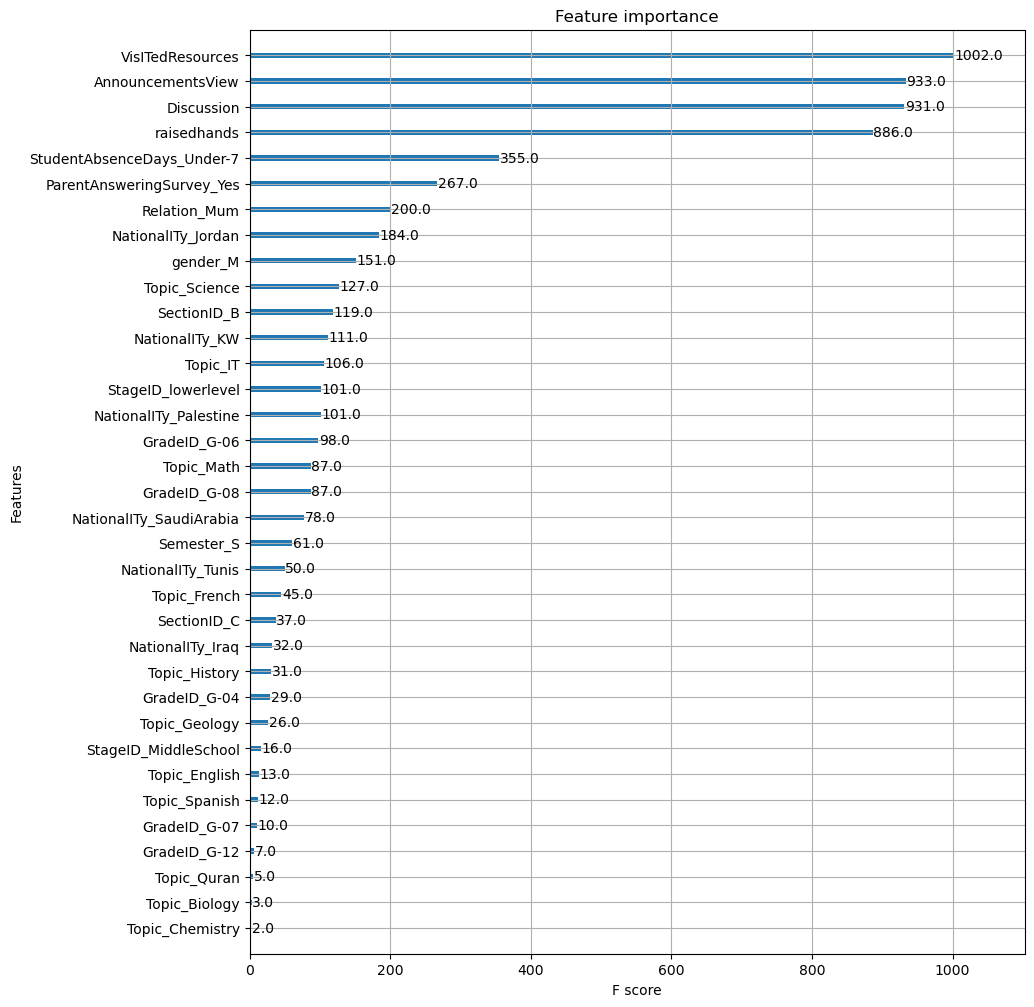

In [428]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방
plot_importance(xgb_wrapper, ax=ax)

### LightGBM 모델 생성/학습하기

In [344]:
from lightgbm import LGBMClassifier

In [346]:
lgbm = LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)

LGBMClassifier(random_state=1)

### LightGBM 모델 평가

In [348]:
lgbm_pred = lgbm.predict(X_test)

In [350]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
lgbm_matrix = metrics.confusion_matrix(y_test, lgbm_pred)
lgbm_matrix

array([[39, 16,  0],
       [ 9, 41,  6],
       [ 0,  3, 30]], dtype=int64)

In [352]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        55
           1       0.68      0.73      0.71        56
           2       0.83      0.91      0.87        33

    accuracy                           0.76       144
   macro avg       0.78      0.78      0.78       144
weighted avg       0.77      0.76      0.76       144



In [430]:
from lightgbm import LGBMClassifier

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400)
# LightGBM도 XGBoost와 동일하게 조기 중단 수행가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                 eval_metric='logloss',
                 eval_set=evals, verbose=True)

[1]	valid_0's multi_logloss: 1.01982
[2]	valid_0's multi_logloss: 0.94956
[3]	valid_0's multi_logloss: 0.891788
[4]	valid_0's multi_logloss: 0.84733
[5]	valid_0's multi_logloss: 0.808874
[6]	valid_0's multi_logloss: 0.775923
[7]	valid_0's multi_logloss: 0.748072
[8]	valid_0's multi_logloss: 0.721543
[9]	valid_0's multi_logloss: 0.703035
[10]	valid_0's multi_logloss: 0.686213
[11]	valid_0's multi_logloss: 0.670269
[12]	valid_0's multi_logloss: 0.655275
[13]	valid_0's multi_logloss: 0.644049
[14]	valid_0's multi_logloss: 0.633286
[15]	valid_0's multi_logloss: 0.622223
[16]	valid_0's multi_logloss: 0.613403
[17]	valid_0's multi_logloss: 0.607766
[18]	valid_0's multi_logloss: 0.597815
[19]	valid_0's multi_logloss: 0.596269
[20]	valid_0's multi_logloss: 0.591789
[21]	valid_0's multi_logloss: 0.588594
[22]	valid_0's multi_logloss: 0.584388
[23]	valid_0's multi_logloss: 0.57741
[24]	valid_0's multi_logloss: 0.574391
[25]	valid_0's multi_logloss: 0.572148
[26]	valid_0's multi_logloss: 0.566371

LGBMClassifier(n_estimators=400)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

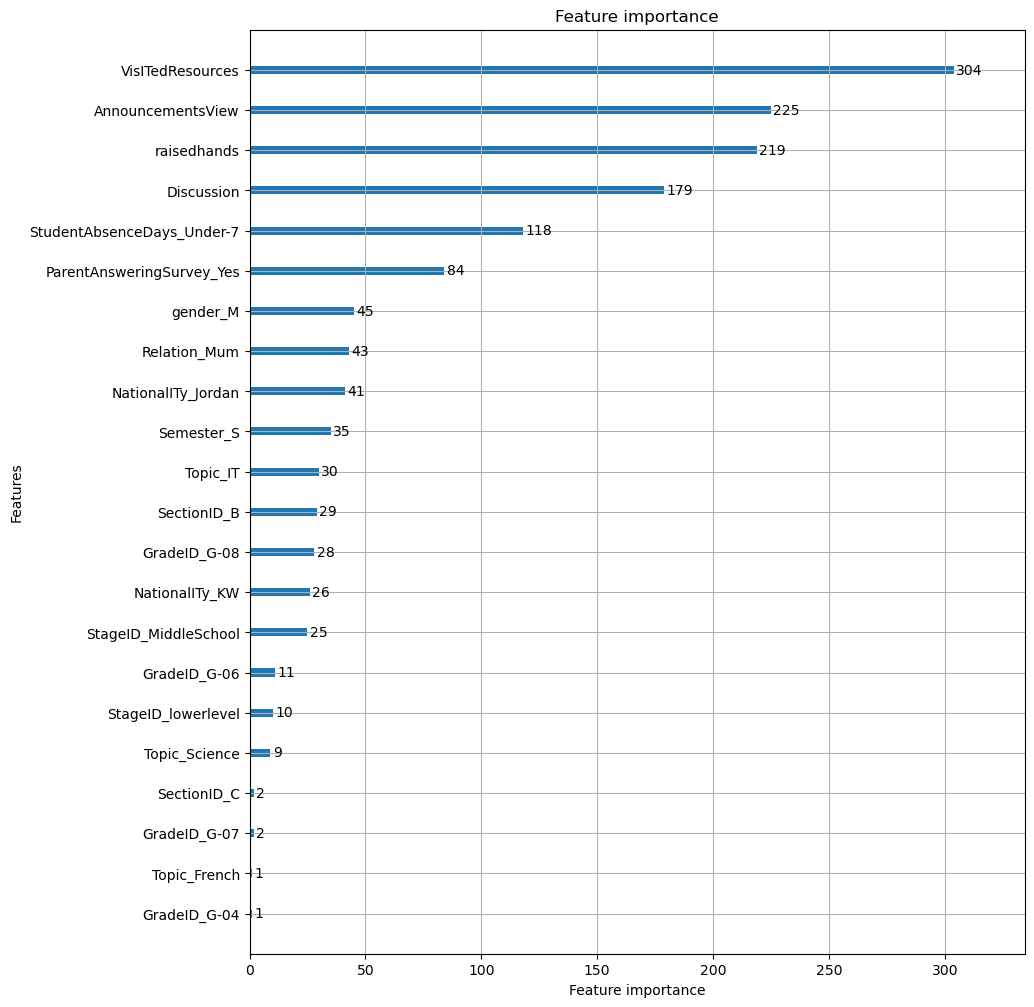

In [432]:
from lightgbm import plot_importance
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [366]:
print('★☆★☆★☆★☆★☆★☆★ KNN 성능 평가 ★☆★☆★☆★☆★☆★☆★\n')
print(classification_report(y_test, knn_pred))
print('\n')
print('★☆★☆★☆★☆★☆★☆★ SVM 성능 평가 ★☆★☆★☆★☆★☆★☆★\n')
print(classification_report(y_test, svm_pred))
print('\n')
print('★☆★☆★☆★☆★☆★☆★ DT 성능 평가 ★☆★☆★☆★☆★☆★☆★\n')
print(classification_report(y_test, dt_pred))
print('\n')
print('★☆★☆★☆★☆★☆★☆★ RF 성능 평가 ★☆★☆★☆★☆★☆★☆★\n')
print(classification_report(y_test, rf_pred))
print('\n')
print('★☆★☆★☆★☆★☆★☆★ GBM 성능 평가 ★☆★☆★☆★☆★☆★☆★\n')
print(classification_report(y_test, gbm_pred))
print('\n')
print('★☆★☆★☆★☆★☆★☆★ XGB 성능 평가 ★☆★☆★☆★☆★☆★☆★\n')
print(classification_report(y_test, xgb_pred))
print('\n')
print('★☆★☆★☆★☆★☆★☆★ LGBM 성능 평가 ★☆★☆★☆★☆★☆★☆★\n')
print(classification_report(y_test, lgbm_pred))
print('\n')

★☆★☆★☆★☆★☆★☆★ KNN 성능 평가 ★☆★☆★☆★☆★☆★☆★

              precision    recall  f1-score   support

           0       0.79      0.56      0.66        55
           1       0.60      0.79      0.68        56
           2       0.78      0.76      0.77        33

    accuracy                           0.69       144
   macro avg       0.73      0.70      0.70       144
weighted avg       0.72      0.69      0.69       144



★☆★☆★☆★☆★☆★☆★ SVM 성능 평가 ★☆★☆★☆★☆★☆★☆★

              precision    recall  f1-score   support

           0       0.70      0.42      0.52        55
           1       0.52      0.68      0.59        56
           2       0.74      0.85      0.79        33

    accuracy                           0.62       144
   macro avg       0.65      0.65      0.63       144
weighted avg       0.64      0.62      0.61       144



★☆★☆★☆★☆★☆★☆★ DT 성능 평가 ★☆★☆★☆★☆★☆★☆★

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        55
         